**Bipartite graphs** should not have a cycle of the odd length. <br>
**Matching** - a set of edges without common vertices. <br>
**Maximal matching** - it is a matching that cannot be extended to a larger matching.

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a bipartite graph
G = nx.Graph()
G.add_edges_from([(1, 'b'), (1, 'c'), (1, 'd'), (2, 'a'), (2, 'c'), (2, 'e'), (3, 'b'),
                  (3, 'c'), (3, 'd'), (4, 'a'), (4, 'e'), (5, 'a'), (5, 'e')])

In [3]:
# Check if graph is bipartite and assign colors
if nx.bipartite.is_bipartite(G):
    left, right = nx.bipartite.sets(G)
    print(f"Graph is bipartite!")
    print(f"Left set: {sorted(left)}")
    print(f"Right set: {sorted(right)}")
    
    # Store the sets for visualization
    for v in left:
        G.nodes[v]['color'] = 'lightblue'
        G.nodes[v]['bipartite'] = 0
    for v in right:
        G.nodes[v]['color'] = 'lightcoral'
        G.nodes[v]['bipartite'] = 1
else:
    print("This graph is not bipartite")

Graph is bipartite!
Left set: [1, 2, 3, 4, 5]
Right set: ['a', 'b', 'c', 'd', 'e']


/var/folders/78/lstcwc951zs14wpz1_zzh_cc0000gn/T/ipykernel_30735/108801202.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


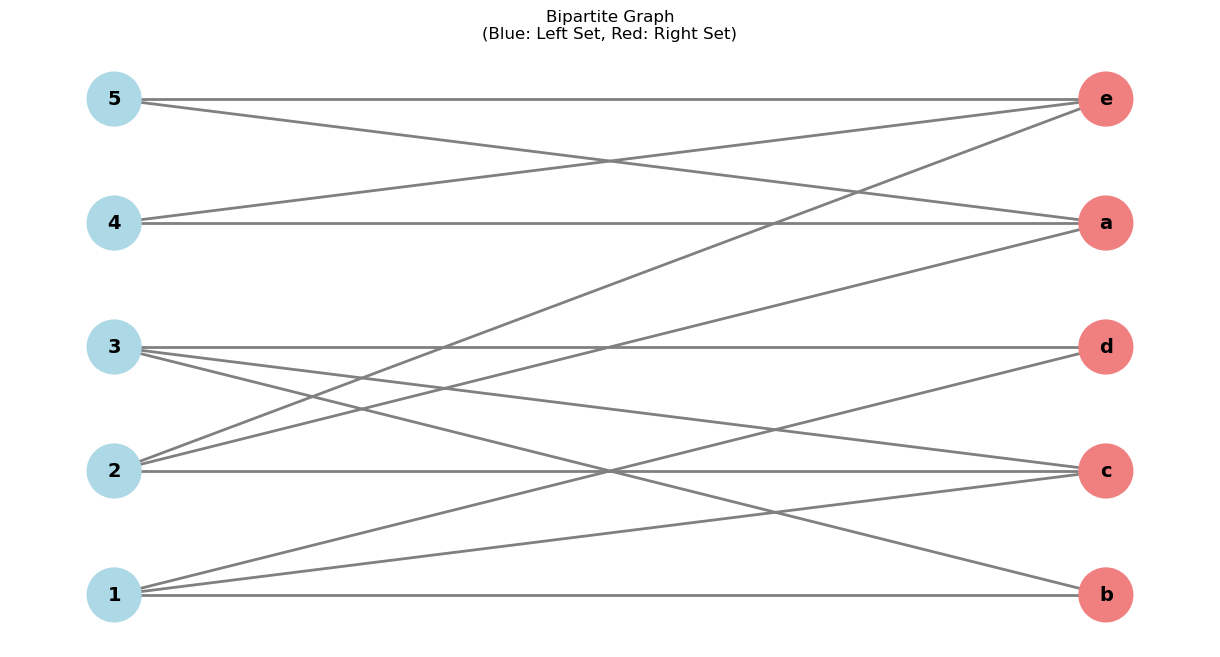

In [4]:
# Visualize the bipartite graph
left, right = nx.bipartite.sets(G)

# Create bipartite layout
pos = nx.bipartite_layout(G, left)

plt.figure(figsize=(12, 6))

# Get node colors
node_colors = [G.nodes[v]['color'] for v in G.nodes()]

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color=node_colors, 
        node_size=1500, font_size=14, font_weight='bold',
        edge_color='gray', width=2)

plt.title("Bipartite Graph\n(Blue: Left Set, Red: Right Set)")
plt.axis('off')
plt.tight_layout()
plt.show()

Maximum matching: {(5, 'a'), (2, 'c'), (4, 'e'), ('d', 1), (3, 'b')}
Matching size: 5


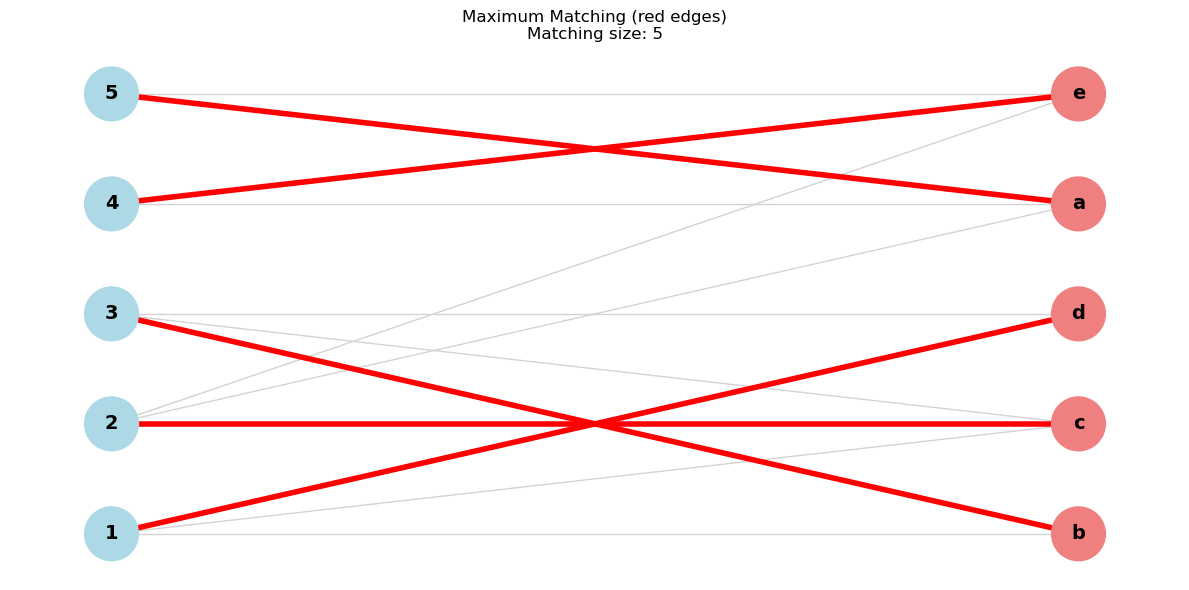

In [5]:
# Find maximum matching
M = nx.max_weight_matching(G)
print(f"Maximum matching: {M}")
print(f"Matching size: {len(M)}")

# Visualize the graph with matching highlighted
plt.figure(figsize=(12, 6))

# Get node colors
node_colors = [G.nodes[v]['color'] for v in G.nodes()]

# Draw all edges in gray first
nx.draw_networkx_edges(G, pos, edge_color='lightgray', width=1)

# Draw matching edges in red/bold
nx.draw_networkx_edges(G, pos, edgelist=M, edge_color='red', width=4)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1500)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=14, font_weight='bold')

plt.title(f"Maximum Matching (red edges)\nMatching size: {len(M)}")
plt.axis('off')
plt.tight_layout()
plt.show()